### Análise dos jogos do metacritic

Este conjunto de dados contém a lista de todos os jogos do metracritic e cada jogo desta lista possui cinco variaveis:
- posição: classificação de acordo com as notas dos críticos
- nome
- plataforma: plataforma do jogo (existe jogos com nomes repetidos porem plataformas diferentes)
- ano de lançamento
- userscore: média das notas dos usuários
- metascore: média das notas dos críticos

Para esta análise vamos usar somente as variaveis numéricas (ano de lançamento, userscore e metascore) e remover os jogos onde não tenha a nota médias dos usuários (pois o site exige uma quantidade mínima de avaliaçãoes para calcular está variável, caso contrário o site conta está variável como "tbd").

In [69]:
#conjunto de dados e removendo os games com valores vazios no userscore
import pandas as pd

data = pd.read_csv("Games_metacritic.csv",sep=";")
data_copy = data.copy()
data_copy = data_copy.iloc[:,1:7]

#remover linhas onde a variavel 'userscore' nao tenha valor
dataNtbd = data_copy.loc[data_copy['userscore'] != 'tbd']

dataNtbd = {'posição':dataNtbd['posição'],
            'nome':dataNtbd['nome'],
            'plataforma':dataNtbd['plataforma'],
            #filtrar os ultimos 4 digitos da coluna 'lançamento'
            'ano de lançamento':dataNtbd['lançamento'].str.split(',').str[1].apply(int),
            'metascore':dataNtbd['metascore'],
            #transformar coluna 'userscore' em float
            'userscore':dataNtbd['userscore'].apply(float)}

dataNtbd = pd.DataFrame(dataNtbd)

# Estatistica descritiva

10 maiores notas dos críticos

In [70]:
dataNtbd.head(10)

,posição,nome,plataforma,ano de lançamento,metascore,userscore
0,1,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,99,9.0
1,2,Tony Hawk's Pro Skater 2,PlayStation,2000,98,7.5
2,3,Grand Theft Auto IV,PlayStation 3,2008,98,7.9
3,4,SoulCalibur,Dreamcast,1999,98,8.4
4,5,Grand Theft Auto IV,Xbox 360,2008,98,8.0
5,6,Super Mario Galaxy,Wii,2007,97,9.1
6,7,Super Mario Galaxy 2,Wii,2010,97,9.1
7,8,Red Dead Redemption 2,Xbox One,2018,97,8.3
8,9,Grand Theft Auto V,Xbox One,2014,97,7.9
9,10,Grand Theft Auto V,PlayStation 3,2013,97,8.3


10 piores notas dos críticos

In [71]:
dataNtbd.tail(10)

,posição,nome,plataforma,ano de lançamento,metascore,userscore
20497,20498,Deal or No Deal,DS,2007,20,2.1
20498,20499,Alone in the Dark: Illumination,PC,2015,19,1.3
20499,20500,Ride to Hell: Retribution,Xbox 360,2013,19,1.3
20500,20501,SPOGS Racing,Wii,2008,18,3.7
20501,20502,Double Dragon II: Wander of the Dragons,Xbox 360,2013,17,1.6
20502,20503,Vroom in the Night Sky,Switch,2017,17,3.3
20503,20504,Leisure Suit Larry: Box Office Bust,PlayStation 3,2009,17,2.0
20504,20505,Yaris,Xbox 360,2007,17,4.5
20505,20506,Ride to Hell: Retribution,PC,2013,16,1.4
20506,20507,Family Party: 30 Great Games Obstacle Arcade,Wii U,2012,11,2.8


Estatística descritiva das variáveis numéricas dos dados.

In [72]:
numericData = dataNtbd[['metascore','userscore','ano de lançamento']]

numericData.describe()

,metascore,userscore,ano de lançamento
count,19097.000000,19097.000000,19097.000000
mean,71.343667,6.954307,2012.035503
std,12.123784,1.362481,6.531240
min,11.000000,0.300000,1995.000000
25%,65.000000,6.300000,2007.000000
50%,73.000000,7.300000,2012.000000
75%,80.000000,7.900000,2018.000000
max,99.000000,9.600000,2023.000000


Correlação das variáveis numéricas.

In [73]:
numericData.corr()

,metascore,userscore,ano de lançamento
metascore,1.000000,0.518312,0.092550
userscore,0.518312,1.000000,-0.219185
ano de lançamento,0.092550,-0.219185,1.000000


Aqui podemos ver que a maior correlação é entre as notas dos críticos e as notas dos usuários. A única correlação negativa, porem baixa é a correlação das notas dos usuários e o ano de lançamento dos jogos enquanto isso a correlação mais baixa é entre as notas dos críticos e o ano de lançamento.

# Gráficos

Abaixo temos o gráfico das quantidades de jogos lançados por ano segundo o metacritic (deste de 1995 até 2023).

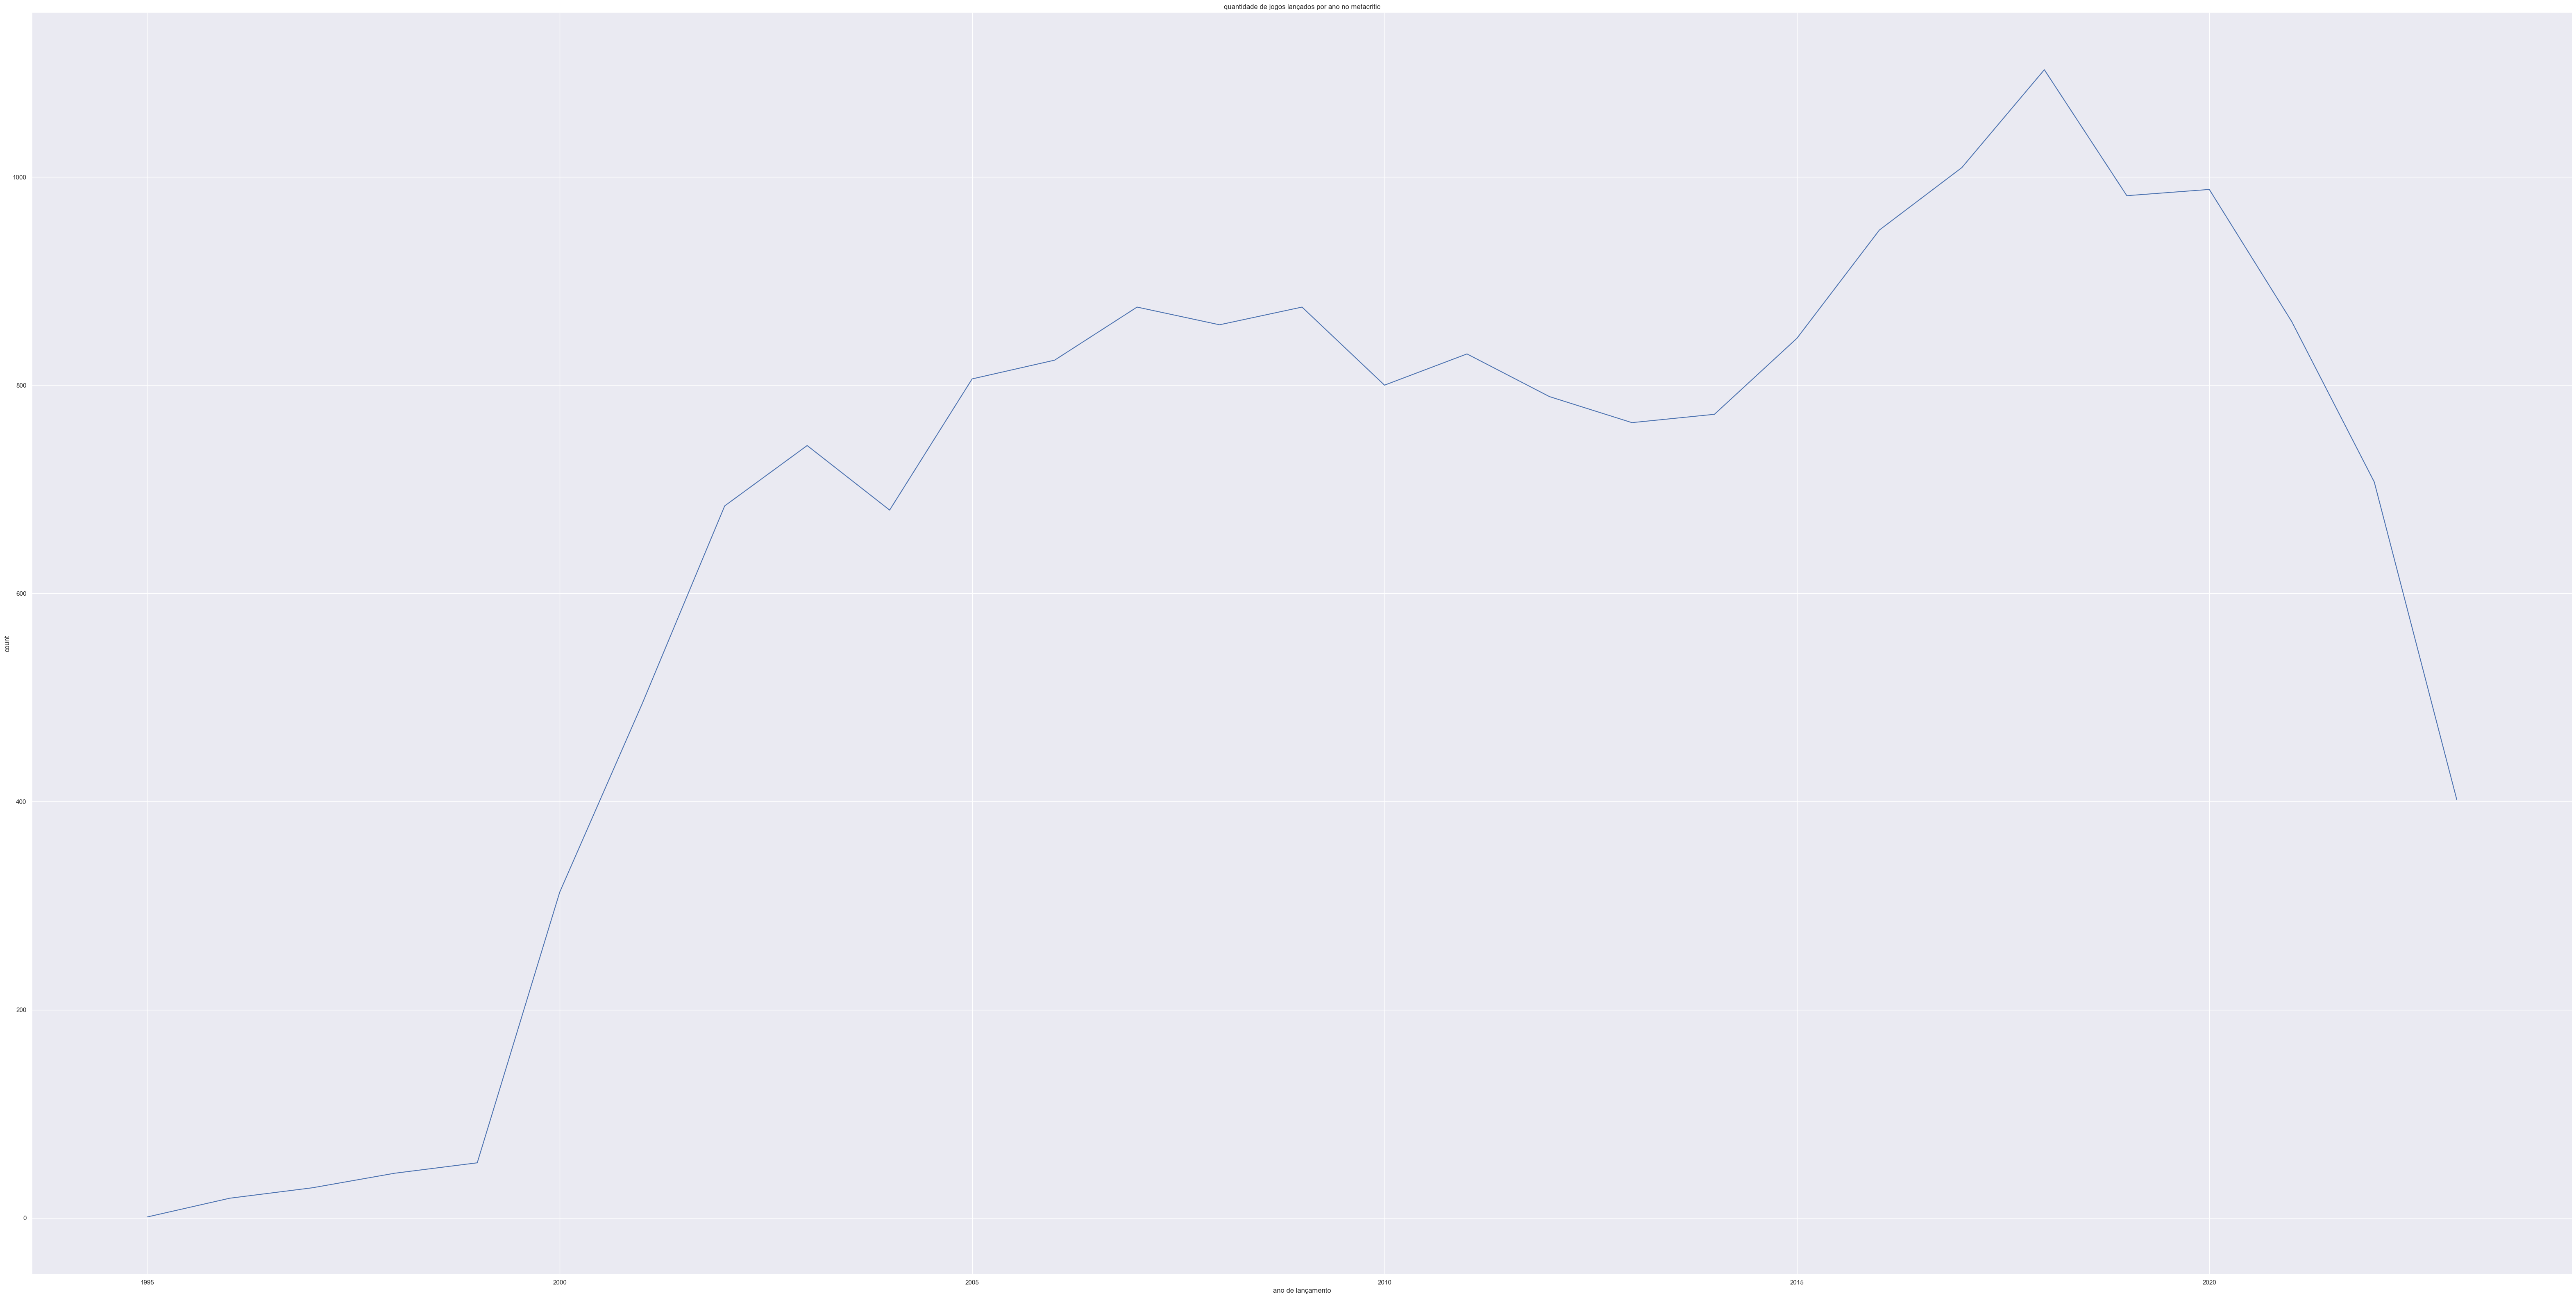

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

frq_year = dataNtbd['ano de lançamento'].value_counts()
frq_year = frq_year.sort_index()

y = frq_year
x = frq_year.index

dyear = sns.lineplot(data = frq_year,x = x,y=y)

plt.title("quantidade de jogos lançados por ano no metacritic")
plt.show()

Gráfico de barras mostrando a quantidade de jogos por plataforma.

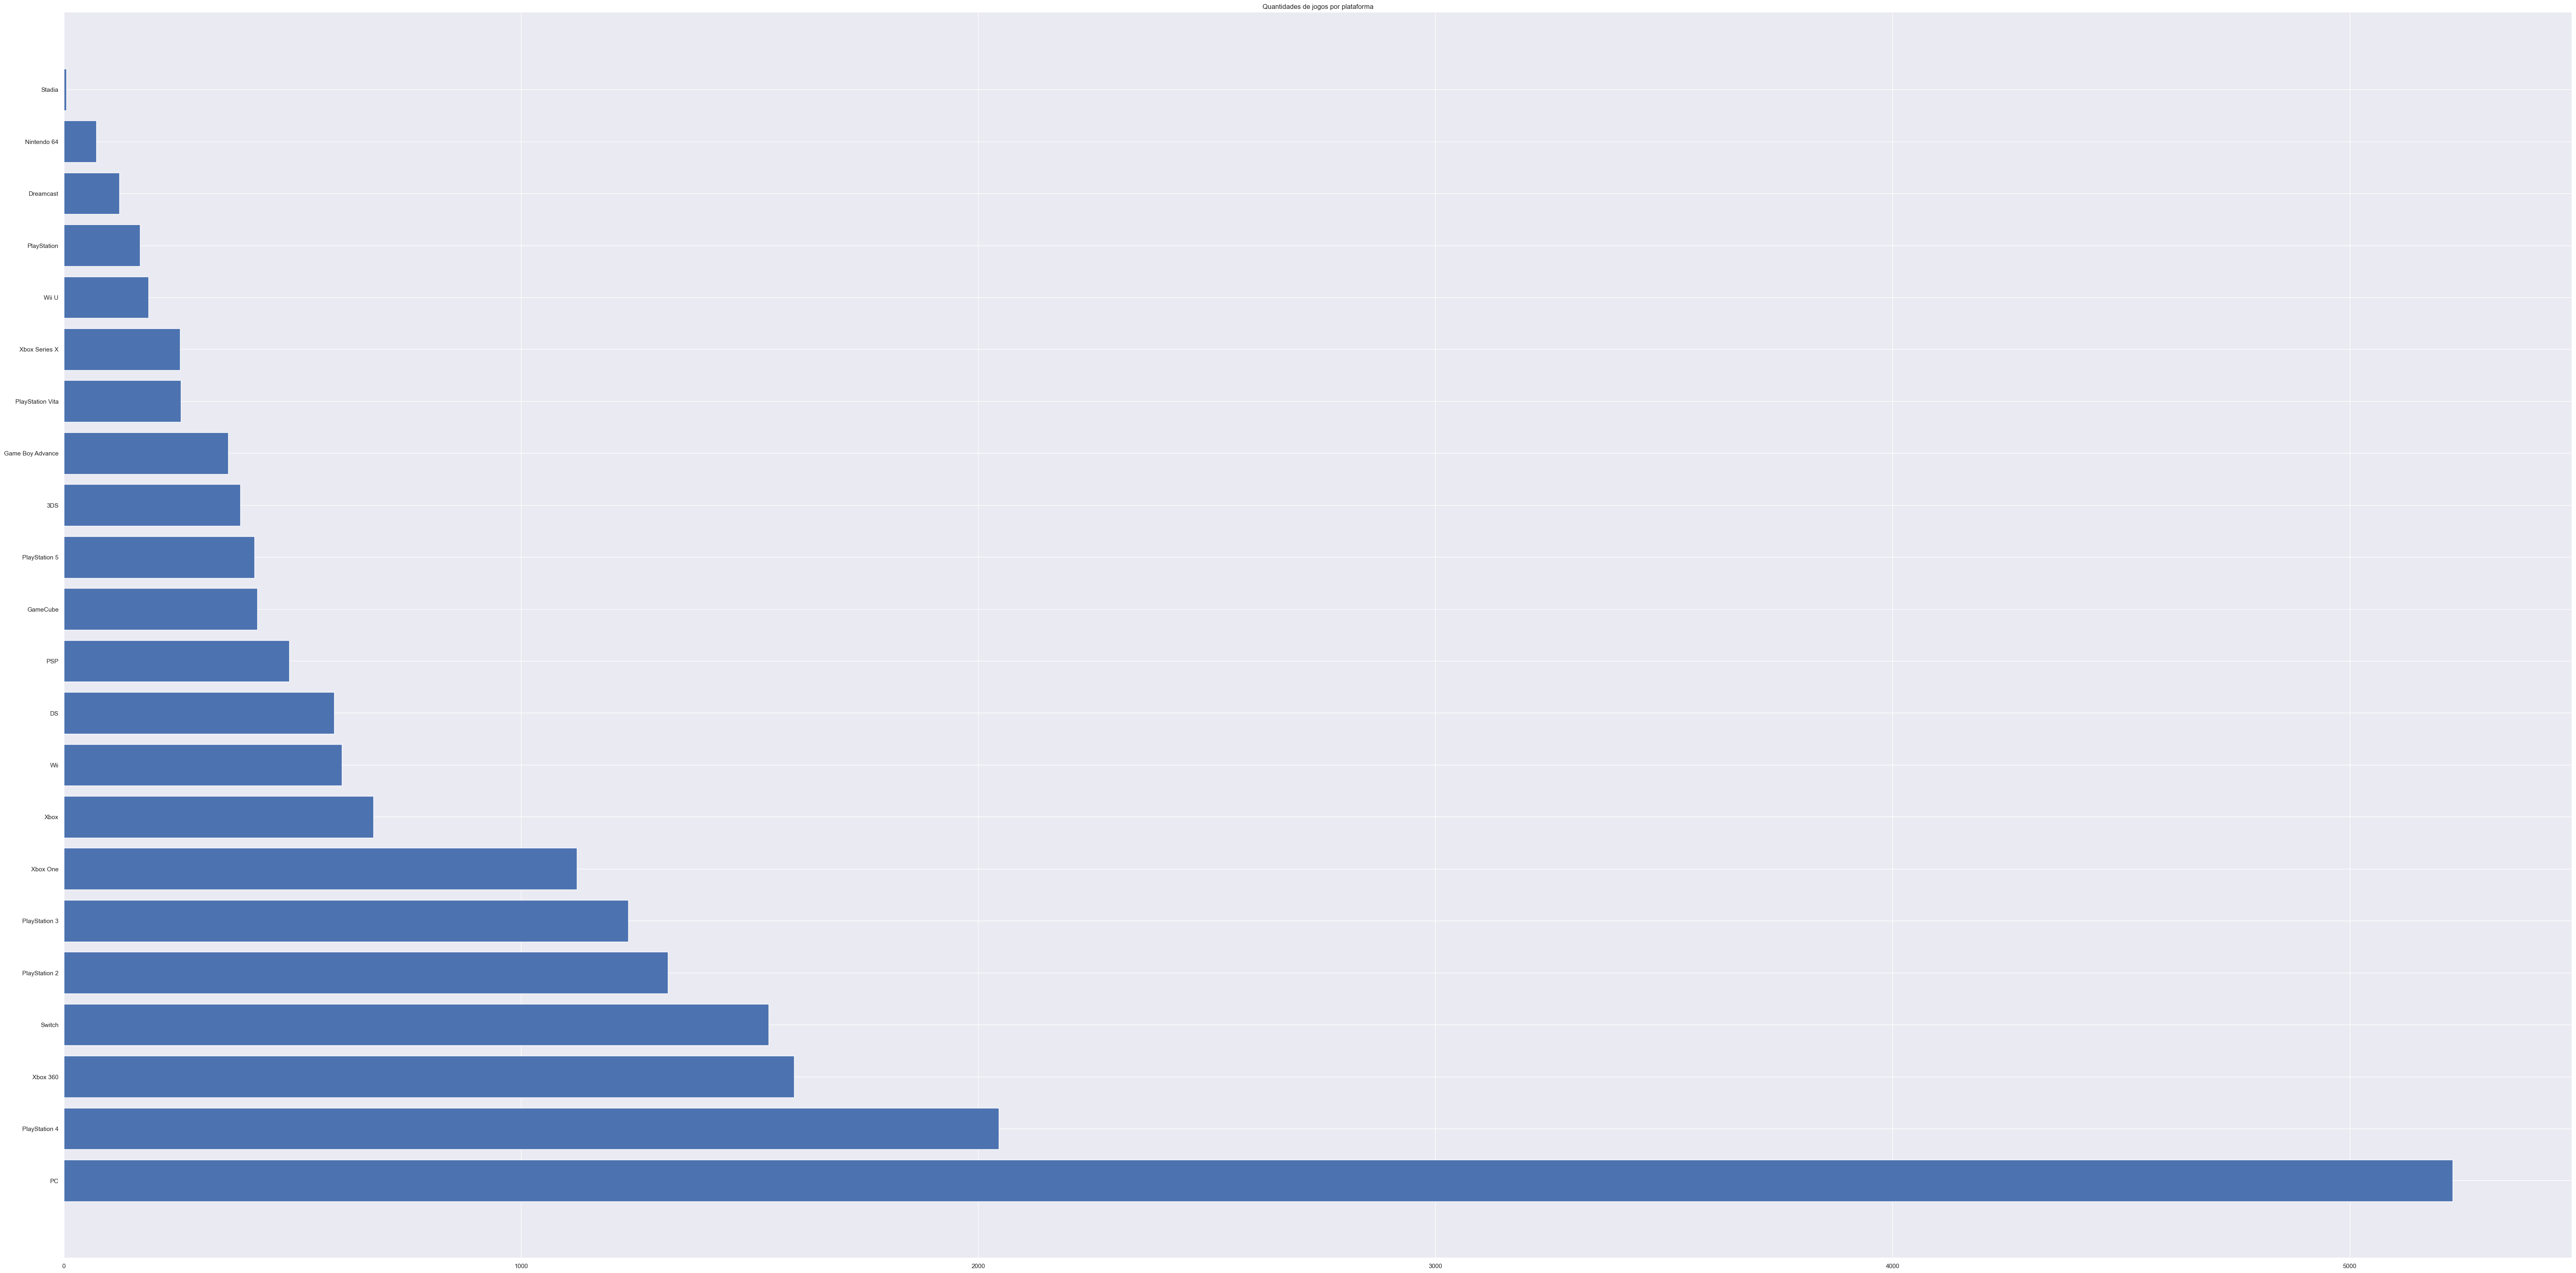

In [75]:
freq_platform = dataNtbd['plataforma'].value_counts()
#print(freq_platform)
plt.barh(freq_platform.index,freq_platform)
plt.title("Quantidades de jogos por plataforma")

plt.show()

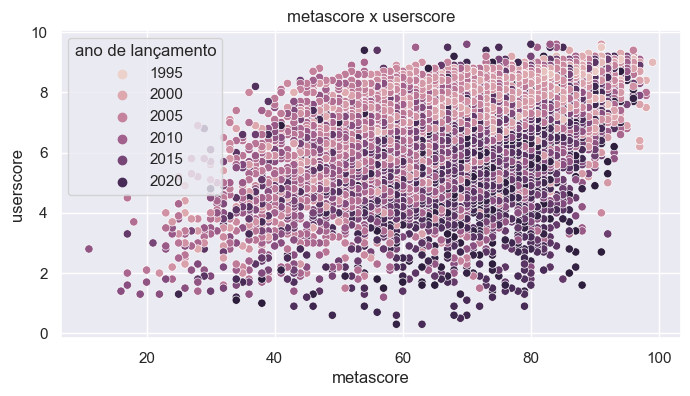

In [76]:
#graficos de dispersão
sns.set(rc={'figure.figsize':(8,4)})
#plt.subplots(figsize = (8,4))
dscores = sns.scatterplot(data=dataNtbd,x = 'metascore',y = 'userscore',hue = 'ano de lançamento')
dscores.set_title("metascore x userscore")
plt.show()

O gráfico de dispersão acima mostra a relações entre as notas dos usuários e dos críticos. Nele da para ver que as notas dos usuários aumentam a medida que as notas dos críticos aumentam, além disso, pela cor dos pontos e possível ver que os jogos mais velhos tentem se consentrar nas notas mais altas, principalmente nas notas dos usuários. Comprovando a correlação destas variáveis vista anteriomente.

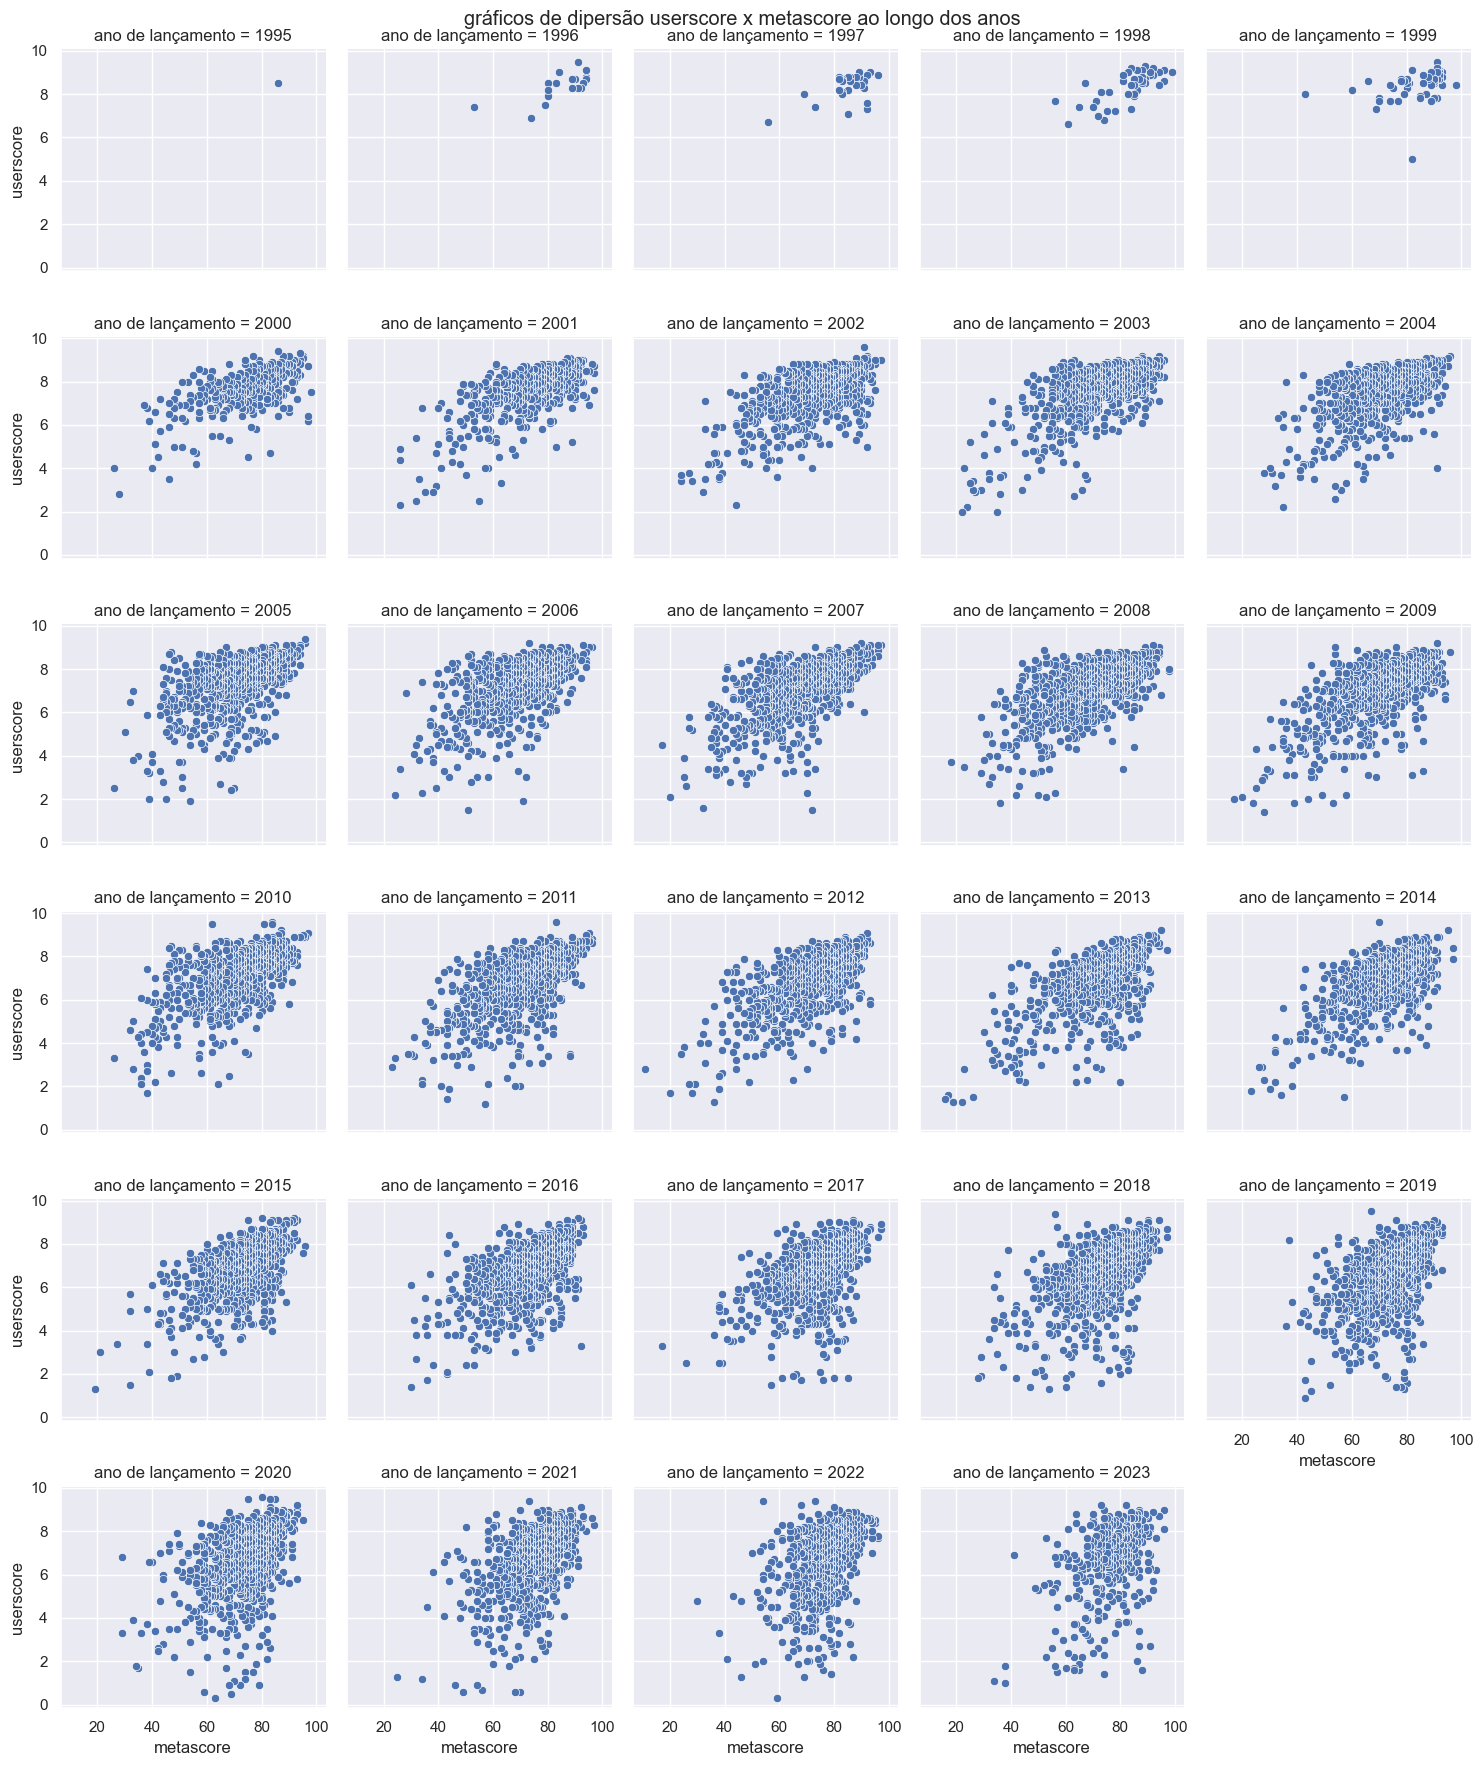

In [77]:
#graficos de dispersão
import warnings
warnings.filterwarnings("ignore")

g = sns.FacetGrid(dataNtbd,col = 'ano de lançamento',col_wrap=5)
g.map_dataframe(sns.scatterplot,x = 'metascore',y = 'userscore')
g.fig.suptitle('gráficos de dipersão userscore x metascore ao longo dos anos')
plt.tight_layout()
plt.show()

Agora temos os gráficos de dispersão das notas divididas por ano de lançamento. Nele podemos ver que existem uma tendencencia das notas dos críticos, mais ou menos a partir de 2019, a darem notas maiores em relação aos anos passados.

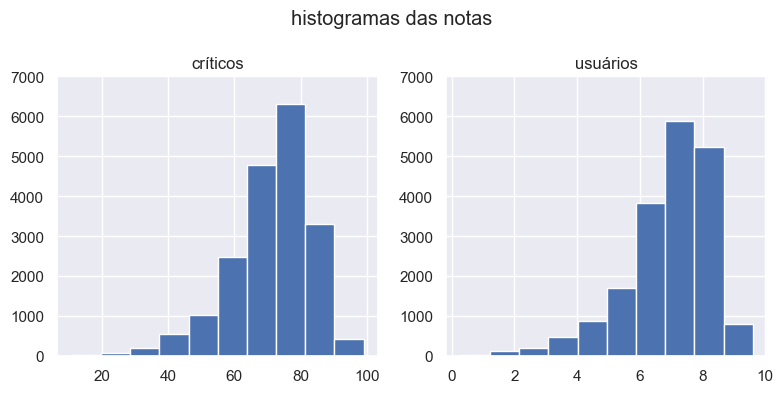

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].hist(dataNtbd['metascore'])
axes[0].set_title("críticos")
axes[0].set_ylim(0, 7000)

axes[1].hist(dataNtbd['userscore'])
axes[1].set_title("usuários")
axes[1].set_ylim(0, 7000)

fig.suptitle('histogramas das notas')

plt.tight_layout()
plt.show()

Histograma das notas dos críticos e usuários, ele mostra que as notas são equivalentes e que a maioria das notas se concentram entre 6 a 10. (as notas dos críticos varia de 0 a 100 e dos usúario de 0 a 10 mas apesar da diferença de intervalos são equivalentes (uma nota 6 dos usuários corresponte a uma nota 60 dos críticos)).

# Análise de regressão


Objetivo: estimar as notas dos usuários de um jogo baseado nas notas dos críticos e no ano de lançamento.

### Criando o modelo (Mínimos quadrados)

In [79]:
#selecionando as variaveis

#variáveis explicativas (independentes)
x = dataNtbd[['metascore','ano de lançamento']]

#variavel resposta (dependente)
y = dataNtbd[['userscore']]

Separando os dados em dois conjuntos: 70% para o conjunto de treino e 30% para o conjunto de teste.

In [80]:
#separando o conjunto de teste e de treino
from sklearn.model_selection import train_test_split

seed = 27
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=seed)

Criando o modelo

In [81]:
#criando o modelo com sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

reg = LinearRegression()
fit = reg.fit(X_train,y_train)

### Diagnostico do modelo

In [82]:
#summary
import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train)#cria uma coluna de 1's  para a criação do intercept
y_train_2 = y_train

reg_sm = sm.OLS(y_train_2,X_train_2).fit()

print(reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              userscore   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     3461.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:58:22   Log-Likelihood:                -20345.
No. Observations:               13367   AIC:                         4.070e+04
Df Residuals:                   13364   BIC:                         4.072e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               116.6933      2.96

Aqui temos o resumo do modelo e mostra que $R^2 = 0.341$, ou seja, o modelo explica $34.1\%$ da variabilidade dos dados e alem disso todas variavéis são significantes para o modelo pois seus p-valor é menor que $0.05$. O modelo pode ser escrito como:

$Y = 116.6933 + X1*0.0613 -X2 * 0.0567$

onde $Y = $ userscore, $X1 = $ metascore e $X2 = $ ano de lançamento.

### Valores estimados pelo modelo

Abaixo temos os graficos de disperção marcando os dados originais (azul) e os dados estimados pelo modelo (preto).

In [83]:
#valores preditos (y chapeu)
y_hat = fit.predict(X_train)
y_hat = pd.DataFrame(y_hat)

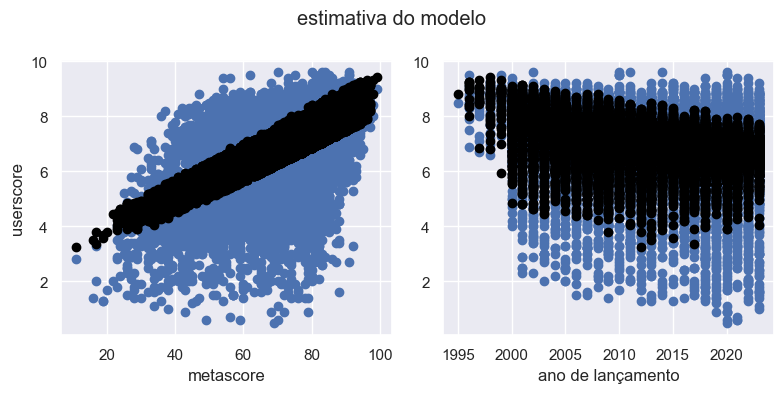

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(X_train['metascore'],y_train['userscore'])
axes[0].scatter(X_train[['metascore']], y_hat,color = 'black')
axes[0].set_xlabel('metascore')
axes[0].set_ylabel('userscore')

axes[1].scatter(X_train['ano de lançamento'],y_train['userscore'])
axes[1].scatter(X_train[['ano de lançamento']], y_hat,color = 'black')
axes[1].set_xlabel('ano de lançamento')

fig.suptitle('estimativa do modelo')

plt.tight_layout()
plt.show()

### conferindo suposições do modelo

Suposições:  
    - linearidade: se há relação entre a variável resposta e explicativas. \
    - homoscedasticidade: se os resíduos tem variância constante. \
    - independência: se os elementos usados para criação dos modelos são independentes. \
    - normalidade: se os resíduos seguem a distribuição normal.

### Resíduos

In [85]:
#calculando os resíduos
import numpy as np
y_train = np.array(y_train)
y_hat = np.array(y_hat)

residuals = y_train - y_hat
residuals = pd.DataFrame(residuals)

In [86]:
#qqnorm dos residuos
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals_array = np.array(residuals)
residuals_array = residuals_array.ravel()
residuals_sorted = np.sort(residuals_array) 

n = 1/len(residuals_sorted)
quantiles = np.arange(0, 1, n)

theoretical_quantiles = stats.norm.ppf(quantiles)

In [87]:
#resumo dos resíduos
residuals.describe().round(4)

,0
count,13367.0000
mean,-0.0000
std,1.1086
min,-6.0725
25%,-0.5091
50%,0.1757
75%,0.7193
max,4.0736


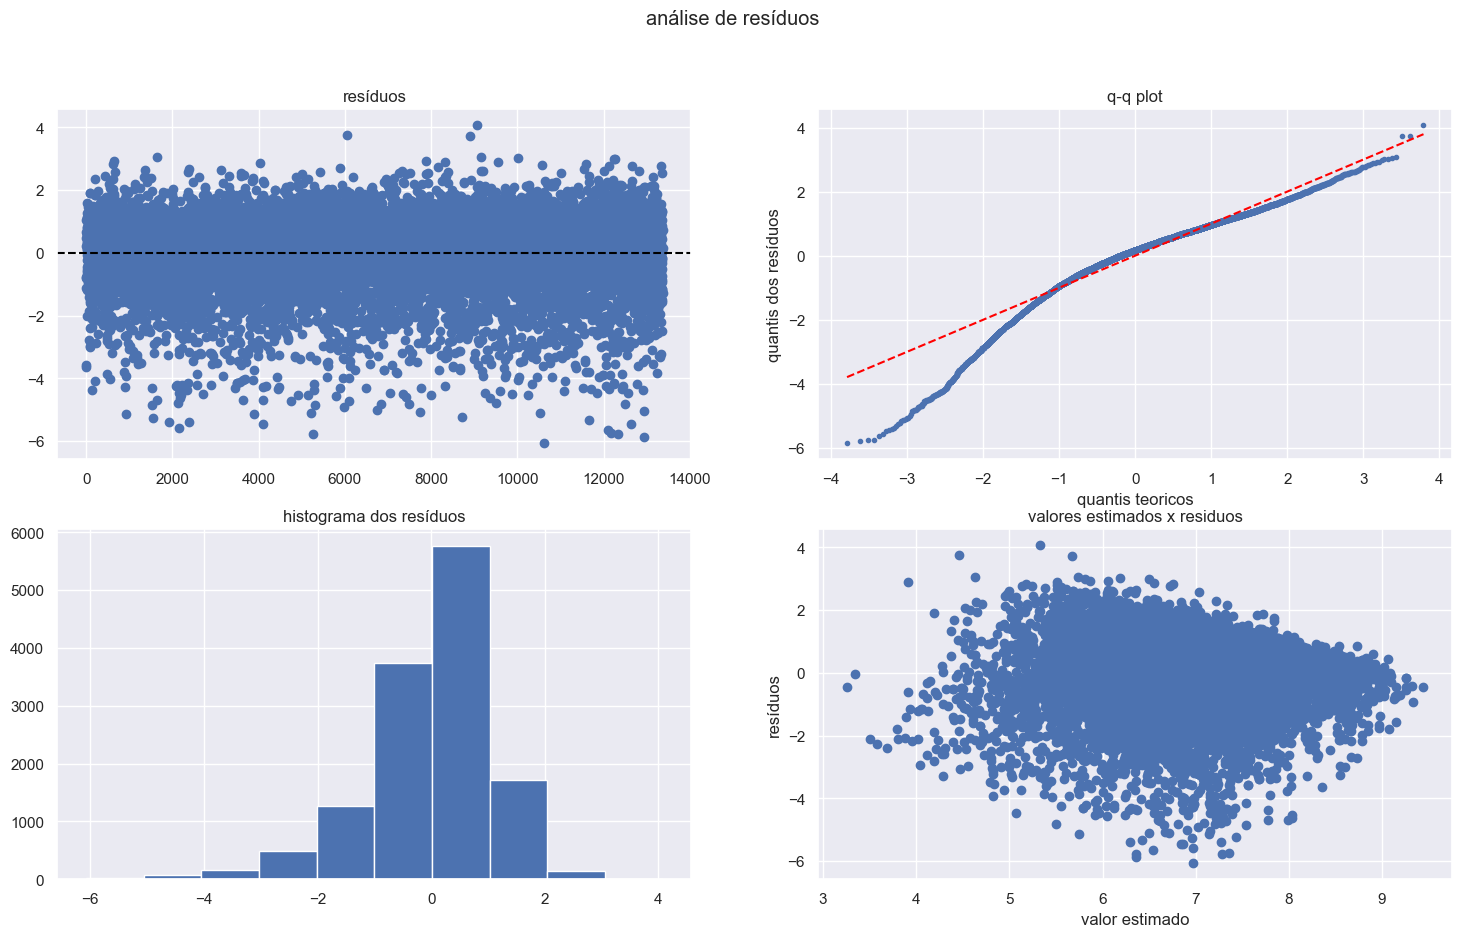

In [88]:
#gerando os graficos
fig, ax = plt.subplots(2,2, figsize = (18,10))

ax[0,0].scatter(range(0,len(residuals)),residuals)
ax[0,0].set_title("resíduos")
ax[0,0].axhline(y = 0,color ='black',linestyle = 'dashed')

ax[1,0].hist(residuals)
ax[1,0].set_title("histograma dos resíduos")

ax[0,1].plot(theoretical_quantiles, residuals_sorted,'.')
ax[0,1].plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--')
ax[0,1].set_title("q-q plot")
ax[0,1].set_xlabel('quantis teoricos')
ax[0,1].set_ylabel('quantis dos resíduos')

ax[1,1].scatter(x = y_hat,y = residuals)
ax[1,1].set_title("valores estimados x residuos")
ax[1,1].set_xlabel('valor estimado')
ax[1,1].set_ylabel('resíduos')
#ax[1,1].regplot(y_hat, theoretical_quantiles)

fig.suptitle('análise de resíduos')
plt.show()

O primeiro gráfico mostra que os resíduos não são correlacionados e tem variância constante e media em torno de 0. Pelos gráficos 2 e 3 podemos ver que os resíduos não tem distribuição normal e no quarto gráfico e possível ver que os resíduos não possuem varância constante.

### Aplicando o modelo no conjunto de teste

In [89]:
y_hat_test = reg.predict(X_test)

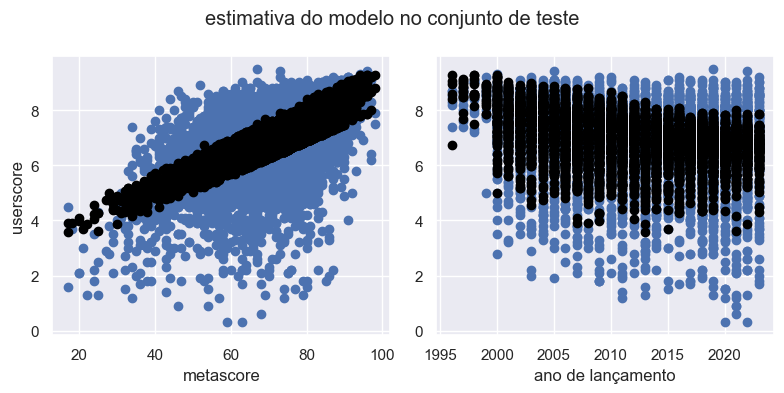

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(X_test['metascore'],y_test['userscore'])
axes[0].scatter(X_test[['metascore']], y_hat_test,color = 'black')
axes[0].set_xlabel('metascore')
axes[0].set_ylabel('userscore')

axes[1].scatter(X_test['ano de lançamento'],y_test['userscore'])
axes[1].scatter(X_test[['ano de lançamento']], y_hat_test,color = 'black')
axes[1].set_xlabel('ano de lançamento')

fig.suptitle('estimativa do modelo no conjunto de teste')

plt.tight_layout()
plt.show()